## K means clustering

In [23]:
from sklearn.cluster import KMeans
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [24]:
# Load your data
data = pd.read_csv('reshaped_data.csv')


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1535040 entries, 0 to 1535039
Data columns (total 6 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   Year             1535040 non-null  int64  
 1   Source_Filename  1535040 non-null  object 
 2   emissions        1535040 non-null  float64
 3   Country          1535040 non-null  object 
 4   Country_Code     1535040 non-null  object 
 5   Industry         1535040 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 70.3+ MB


In [30]:

# Pivot table to get emissions data for clustering
country_data = data.pivot_table(index='Country', columns='Year', values='emissions', aggfunc='sum').fillna(0)

# Perform K-means clustering
kmeans = KMeans(n_clusters=5)  # Number of clusters
clusters = kmeans.fit_predict(country_data)

# Add cluster labels to the DataFrame
country_data['Cluster'] = clusters

In [33]:
country_data

Year,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2020,2021,2022,2023,2024,2025,2026,2027,2028,Cluster
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,13181.903475,13317.972161,12493.232512,12676.580324,12852.394987,13243.776853,14591.261376,15685.613319,16545.441906,17591.782986,...,31804.456673,32350.739131,33106.001947,33861.358637,34616.801437,35372.323427,36127.918410,36883.580828,37639.305678,0
Albania,10505.512795,8122.089230,5448.923485,5548.634241,6188.319425,5771.234426,5437.356074,4780.927944,4999.269452,5470.195325,...,6412.968872,6264.259828,6292.065502,6321.245305,6349.746525,6383.978648,6413.929733,6530.476705,6575.034236,0
Algeria,127449.125887,129273.938764,138424.931224,143129.620966,140866.128017,151118.555871,152437.763468,147065.713072,145387.519860,151364.060585,...,222730.579606,217943.901154,221264.951087,224586.001021,227907.050955,231228.100888,234549.150822,237870.200755,241191.250689,0
Angola,31022.228623,30964.618011,30148.332615,33824.401337,44002.342763,51135.653451,61339.156438,64247.873100,69007.851365,69627.347260,...,60765.611803,61421.181332,62338.259791,63255.338249,64172.416708,65130.184365,66057.625551,66985.130257,67912.693338,0
Argentina,225362.322382,228355.216612,229327.712796,228024.467129,234128.385685,236902.255244,242008.017513,247440.977872,252744.732171,261783.504627,...,335854.935626,354274.732257,358638.339010,363001.945763,367365.552516,371729.159269,376092.766022,380456.372775,384819.979529,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Viet Nam,101725.951206,105564.597539,108399.457060,111838.651464,117976.964476,125152.118709,131401.209420,137007.942923,145617.275930,150671.633674,...,457711.404596,463343.943672,476990.471483,490636.999293,504283.527104,517930.054914,531576.582725,545223.110535,558869.638346,4
Yemen Arab Republic/Yemen,15613.248449,16907.489057,17403.326844,17751.596733,20017.359364,20244.674605,21136.956944,22623.984140,23461.593354,26237.605151,...,37489.419604,38963.942730,39795.108178,40626.273626,41457.439073,42288.604521,43119.769969,43950.935416,44782.100864,0
Yugoslavia/Serbia,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0


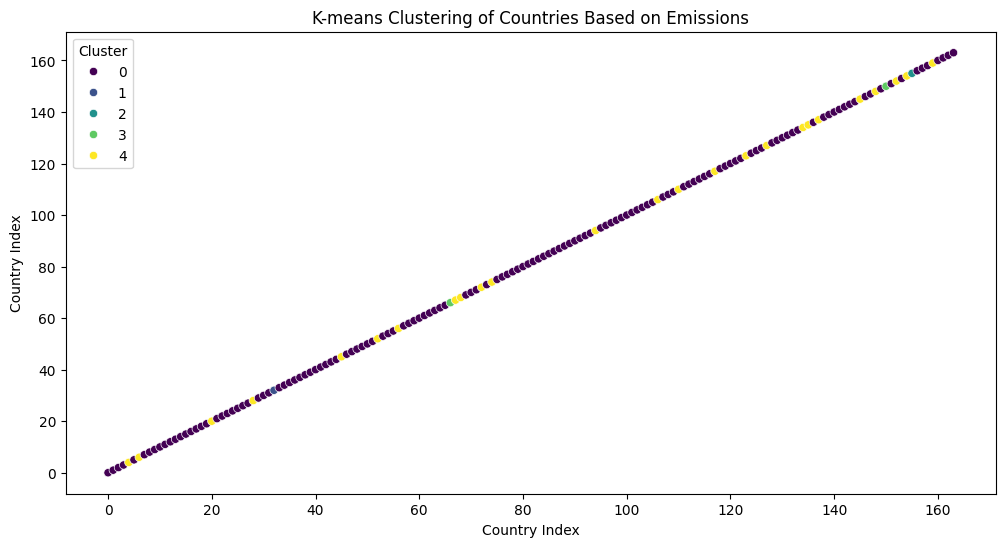

In [31]:
# Reset index to use Country as a column
country_data_reset = country_data.reset_index()

# Plot clusters (example using first two principal components if necessary)
plt.figure(figsize=(12, 6))
sns.scatterplot(x=country_data_reset.index, y=country_data_reset.index, hue=country_data_reset['Cluster'], palette='viridis')
plt.title('K-means Clustering of Countries Based on Emissions')
plt.xlabel('Country Index')
plt.ylabel('Country Index')
plt.legend(title='Cluster')
plt.show()


### Regression Analysis

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# Prepare data for regression
regression_data = data.copy()
# Drop 'Country_Code' column as it's not needed
regression_data = regression_data.drop(columns=['Country_Code'])

# If 'Year' is not already numerical, convert it
if not pd.api.types.is_integer_dtype(regression_data['Year']):
    regression_data['Year'] = pd.to_datetime(regression_data['Year'], format='%Y').dt.year

# Encode categorical variables
regression_data = pd.get_dummies(regression_data, columns=['Country', 'Industry'])



In [62]:

# Define features and target
X = regression_data.drop(columns=['emissions', 'Source_Filename'])
y = regression_data['emissions']


In [63]:

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [64]:

# Fit Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [65]:

# Predict and evaluate
y_pred = model.predict(X_test)

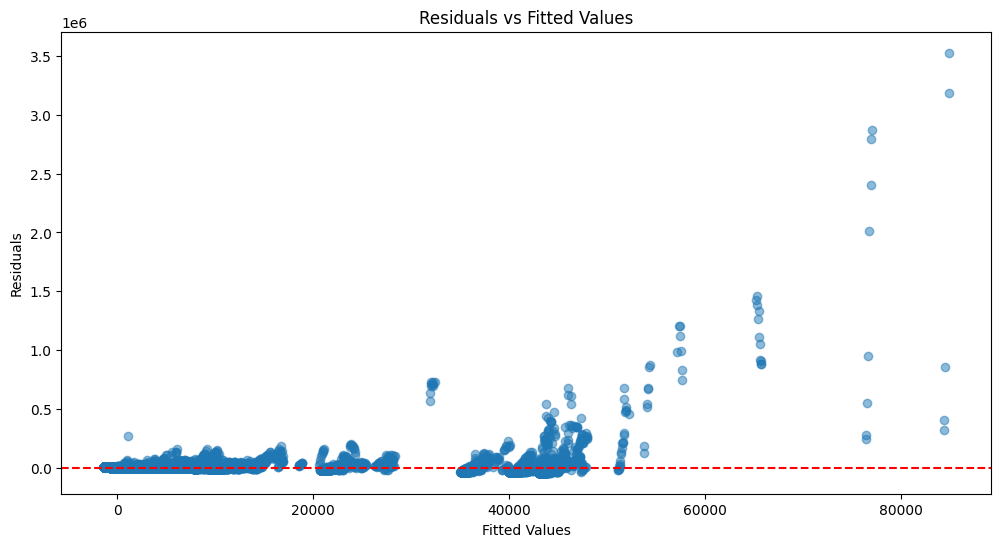

In [66]:

# Calculate residuals
residuals = y_test - y_pred

plt.figure(figsize=(12, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals vs Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

In [67]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')


R-squared: 0.07499153305213169


In [68]:
# Feature importance using Linear Regression coefficients
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)


                                                     Coefficient
Year                                                1.671141e+01
Country_Afghanistan                                 9.530988e+12
Country_Albania                                     9.530988e+12
Country_Algeria                                     9.530988e+12
Country_Angola                                      9.530988e+12
...                                                          ...
Industry_Water collection, treatment and supply...  5.213522e+08
Industry_Water transport industry                   5.213538e+08
Industry_Water transport product                    5.213522e+08
Industry_Wholesale and retail trade; repair of ...  5.213528e+08
Industry_Wholesale and retail trade; repair of ...  5.213521e+08

[405 rows x 1 columns]
